<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/ML_Refractive_Index_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

### Libs

In [1]:
!pip install -q import_ipynb shap pymatgen scikit-learn-intelex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 k

In [2]:
from sklearnex import patch_sklearn

In [3]:
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
# utils
import os, sys, warnings, itertools
import shap
import random
import pickle
import import_ipynb
import pandas as pd
import numpy as np
# colab
from google.colab import drive
# lightgbm
import lightgbm as lgb
# xgboost
import xgboost as xgb
# sklearn
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OneHotEncoder,
                                   FunctionTransformer)
from sklearn.base import (BaseEstimator, TransformerMixin)
from sklearn.compose import (ColumnTransformer, make_column_transformer)
from sklearn.pipeline import (Pipeline, make_pipeline)
from sklearn.linear_model import (LinearRegression,
                                  Ridge,
                                  Lasso,
                                  LogisticRegression,
                                  RidgeClassifier,
                                  )
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             r2_score,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             roc_curve,
                             auc,
                             precision_recall_curve,
                             RocCurveDisplay,
                             PrecisionRecallDisplay,
                             )
from sklearn.model_selection import (train_test_split,
                                     GridSearchCV,
                                     cross_val_score,
                                     RandomizedSearchCV,
                                     KFold,
                                     )
from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor,
                              GradientBoostingClassifier,
                              GradientBoostingRegressor,
                              BaggingClassifier,
                              BaggingRegressor,
                              ExtraTreesClassifier,
                              ExtraTreesRegressor,
                              AdaBoostClassifier,
                              AdaBoostRegressor,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              StackingClassifier,
                              StackingRegressor,
                              VotingClassifier,
                              )
# pymatgen
import pymatgen as pym
from pymatgen.ext.matproj import MPRester
from pymatgen.core.composition import Composition
from pymatgen.core.periodic_table import Element
# vis
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### Settings

In [5]:
warnings.filterwarnings('ignore')

In [6]:
# mount google drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
# working directory
working_dir = '/content/drive/MyDrive/Jupyter Notebooks/'
os.chdir(working_dir)

In [8]:
# module dir
module_path = os.path.abspath(os.path.join("./"))
if module_path not in sys.path:
    sys.path.append(module_path)

In [9]:
# load MachineLearningUtils module
from MachineLearningUtils import *

## Materials Encoder

In [10]:
class materials_encoder:
    def __init__(self, descriptor):
        """
        Initialize the VectorizeFormula class by loading the elemental properties data from a file.
        """

        self.element_df = descriptor.copy()
        self.element_df.set_index('Symbol', inplace=True)

        self.column_names = [f'{stat}_{prop}'
                             for stat in ['avg', 'diff', 'max', 'min']
                             for prop in self.element_df.columns]

    def get_features(self, formula):
        """
        Generate features based on the composition of the given chemical formula.

        Parameters:
        - formula: Chemical formula as a string (e.g., 'H2O')

        Returns:
        - A numpy array of computed features (average, difference, max, min properties).
          If an element is missing from the database, returns NaNs.
        """
        try:
            fractional_composition = self._get_fractional_composition(formula)
            if fractional_composition is None:
                return self._return_nan_features()

            avg_feature, diff_feature, max_feature, min_feature = self._compute_features(fractional_composition)

            features = np.concatenate([avg_feature, diff_feature, max_feature, min_feature])
            return features

        except Exception as e:
            print(f'Error processing formula {formula}: {str(e)}')
            return self._return_nan_features()

    def _get_fractional_composition(self, formula):
        """
        Parse the formula and return its fractional composition as a dictionary.
        Returns None if an element is missing in the database.
        """
        try:
            comp = Composition(formula)
            return comp.fractional_composition.as_dict()
        except Exception as e:
            print(f'Invalid formula or parsing error for {formula}: {str(e)}')
            return None

    def _compute_features(self, fractional_composition):
        """
        Compute average, difference, max, and min features for the given composition.
        """

        avg_feature = np.zeros(len(self.element_df.columns))
        diff_feature = np.zeros(len(self.element_df.columns))

        element_keys = list(fractional_composition.keys())

        for element in element_keys:
            if element not in self.element_df.index:
                print(f"Element '{element}' not found in the database.")
                return self._return_nan_features()

        for element, fraction in fractional_composition.items():
            avg_feature += self.element_df.loc[element].values * fraction

        max_feature = self.element_df.loc[element_keys].max().values
        min_feature = self.element_df.loc[element_keys].min().values
        diff_feature = max_feature - min_feature

        return avg_feature, diff_feature, max_feature, min_feature

    def _return_nan_features(self):
        """
        Return a numpy array filled with NaNs for unsupported or invalid formulas.
        """
        num_features = len(self.element_df.columns) * 4
        return np.full(num_features, np.nan)

## Dataset

In [11]:
api_key = 'MzZ18JtTiTJwxOwZVvjL'

In [12]:
properties = ["pretty_formula", "band_gap"]

In [13]:
criteria = {
    "crystal_system": {"$eq": "cubic"},
    "band_gap": {"$gt": 0.5},
    }

with MPRester(api_key) as mpr:
  materials = mpr.query(criteria, properties)

100%|██████████| 4041/4041 [00:02<00:00, 1921.16it/s]


In [14]:
df = pd.DataFrame(materials)
df.rename(columns={"pretty_formula": "Composition",
                   "band_gap": "Eg"},
          inplace=True)

A = 13.6 # eV
df['n'] = np.sqrt(1 + (A / df['Eg']))
df['n'] = df['n'].replace([np.inf, -np.inf], np.nan)

In [15]:
elements = set()

for material in materials:
    formula = material['pretty_formula']
    composition = Composition(formula)
    elems = composition.elements
    elements.update([el.symbol for el in elems])

elements = sorted(list(elements))

In [16]:
descriptor = []

for symbol in elements:
    el = Element(symbol)
    descriptor.append({
        'Symbol': symbol,
        'Atomic number': el.Z,
        'Atomic weight': el.atomic_mass,
        'Period number': el.row,
        'Group number': el.group,
        'Velocity of Sound': el.velocity_of_sound,
        'Reflectivity': el.reflectivity,
        'Refractive index': el.refractive_index,
        'L quantum number': el.full_electronic_structure[2][0] if len(el.full_electronic_structure) > 2 else None,
        'Mendeleev number': el.mendeleev_no,
        'Atomic radius (Å)': el.atomic_radius,
        'Pauling EN': el.X,
        'Allen EN': el.electrical_resistivity,  # Not a direct equivalent
        'Number of s electrons': len([x for x in el.full_electronic_structure if x[1] == 's']),
        'Number of p electrons': len([x for x in el.full_electronic_structure if x[1] == 'p']),
        'Number of d electrons': len([x for x in el.full_electronic_structure if x[1] == 'd']),
        'First ionization energy (kJ/mol)': el.ionization_energies[0] if el.ionization_energies else None,
        'Melting point (K)': el.melting_point,
        'Boiling point (K)': el.boiling_point,
        'Density (g/mL)': el.density_of_solid,
        'Thermal conductivity (W/m•K)': el.thermal_conductivity,
    })

descriptor = pd.DataFrame(descriptor)

## Process Data

### Understand Data

In [17]:
df.set_index('Composition', inplace=True)

In [18]:
descriptor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Symbol                            88 non-null     object 
 1   Atomic number                     88 non-null     int64  
 2   Atomic weight                     88 non-null     float64
 3   Period number                     88 non-null     int64  
 4   Group number                      88 non-null     int64  
 5   Velocity of Sound                 72 non-null     float64
 6   Reflectivity                      24 non-null     float64
 7   Refractive index                  19 non-null     float64
 8   L quantum number                  84 non-null     float64
 9   Mendeleev number                  88 non-null     float64
 10  Atomic radius (Å)                 84 non-null     float64
 11  Pauling EN                        85 non-null     float64
 12  Allen EN  

In [19]:
cols = list(descriptor.columns)
cols.remove('Symbol')
descriptor[cols] = descriptor[cols].fillna(descriptor[cols].mean())
del cols

In [20]:
encoder = materials_encoder(descriptor)

features = []
for formula in df.index:
    feature = encoder.get_features(formula)
    features.append(feature)

desc = pd.DataFrame(features, columns=encoder.column_names)
desc.index = df.index

In [21]:
reduce_memory_usage(df=desc, category=True)

Memory usage of dataframe is 2.497261 MB!
Memory usage after optimization is 0.678268 MB!
Decreased by 72.8%


In [22]:
summarize_columns(desc)

,col_name,dtypes,missing,missing_percent,uniques,first_value,second_value,third_value
0,avg_Atomic number,float16,0,0.0,1195,18.000000,46.812500,21.593750
1,avg_Atomic weight,float16,0,0.0,2150,36.093750,112.937500,50.156250
2,avg_Period number,float16,0,0.0,381,3.666016,5.199219,3.000000
3,avg_Group number,float16,0,0.0,404,6.000000,7.199219,10.796875
4,avg_Velocity of Sound,float16,0,0.0,1886,3274.000000,2358.000000,1713.000000
...,...,...,...,...,...,...,...,...
75,min_First ionization energy (kJ/mol),float16,0,0.0,84,6.113281,5.210938,6.824219
76,min_Melting point (K),float16,0,0.0,44,1115.000000,317.250000,54.812500
77,min_Boiling point (K),float16,0,0.0,39,1757.000000,550.000000,90.187500
78,min_Density (g/mL),float16,0,0.0,44,1550.000000,1823.000000,1738.000000


In [23]:
display_df(desc)

Dataframe:  
num_rows = 4,041 
num_cols = 80


,avg_Atomic number,avg_Atomic weight,avg_Period number,avg_Group number,avg_Velocity of Sound,avg_Reflectivity,avg_Refractive index,avg_L quantum number,avg_Mendeleev number,avg_Atomic radius (Å),...,min_Pauling EN,min_Allen EN,min_Number of s electrons,min_Number of p electrons,min_Number of d electrons,min_First ionization energy (kJ/mol),min_Melting point (K),min_Boiling point (K),min_Density (g/mL),min_Thermal conductivity (W/m•K)
Composition,,,,,,,,,,,,,,,,,,,,,
Ca2Si,18.000000,36.09375,3.666016,6.000000,3274.0,54.62500,1.075195,2.0,39.0000,1.566406,...,1.000000,3.400000e-08,3.0,2.0,0.0,6.113281,1115.0000,1757.0000,1550.0,150.000000
Ba3SbP,46.812500,112.93750,5.199219,7.199219,2358.0,65.37500,1.060547,2.0,44.0000,1.780273,...,0.890137,1.000000e-07,3.0,2.0,0.0,5.210938,317.2500,550.0000,1823.0,0.235962
HfMgO3,21.593750,50.15625,3.000000,10.796875,1713.0,69.18750,1.030273,2.0,85.1875,0.970215,...,1.299805,4.400000e-08,2.0,1.0,0.0,6.824219,54.8125,90.1875,1738.0,0.026581
CdSiO3,17.203125,37.68750,2.800781,14.796875,1092.0,59.78125,1.030273,2.0,92.6250,0.890137,...,1.690430,7.000000e-08,2.0,1.0,0.0,8.148438,54.8125,90.1875,2330.0,0.026581
CaGeO3,15.203125,32.15625,2.800781,12.796875,2032.0,67.93750,1.030273,2.0,80.6250,0.970215,...,1.000000,3.400000e-08,2.0,1.0,0.0,6.113281,54.8125,90.1875,1550.0,0.026581


Info:
<class 'pandas.core.frame.DataFrame'>
Index: 4041 entries, Ca2Si to Mg(BiO2)2
Data columns (total 80 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   avg_Atomic number                      4041 non-null   float16
 1   avg_Atomic weight                      4041 non-null   float16
 2   avg_Period number                      4041 non-null   float16
 3   avg_Group number                       4041 non-null   float16
 4   avg_Velocity of Sound                  4041 non-null   float16
 5   avg_Reflectivity                       4041 non-null   float16
 6   avg_Refractive index                   4041 non-null   float16
 7   avg_L quantum number                   4041 non-null   float16
 8   avg_Mendeleev number                   4041 non-null   float16
 9   avg_Atomic radius (Å)                  4041 non-null   float16
 10  avg_Pauling EN                         4041 non-null   float16

In [24]:
cols = list(desc.columns)

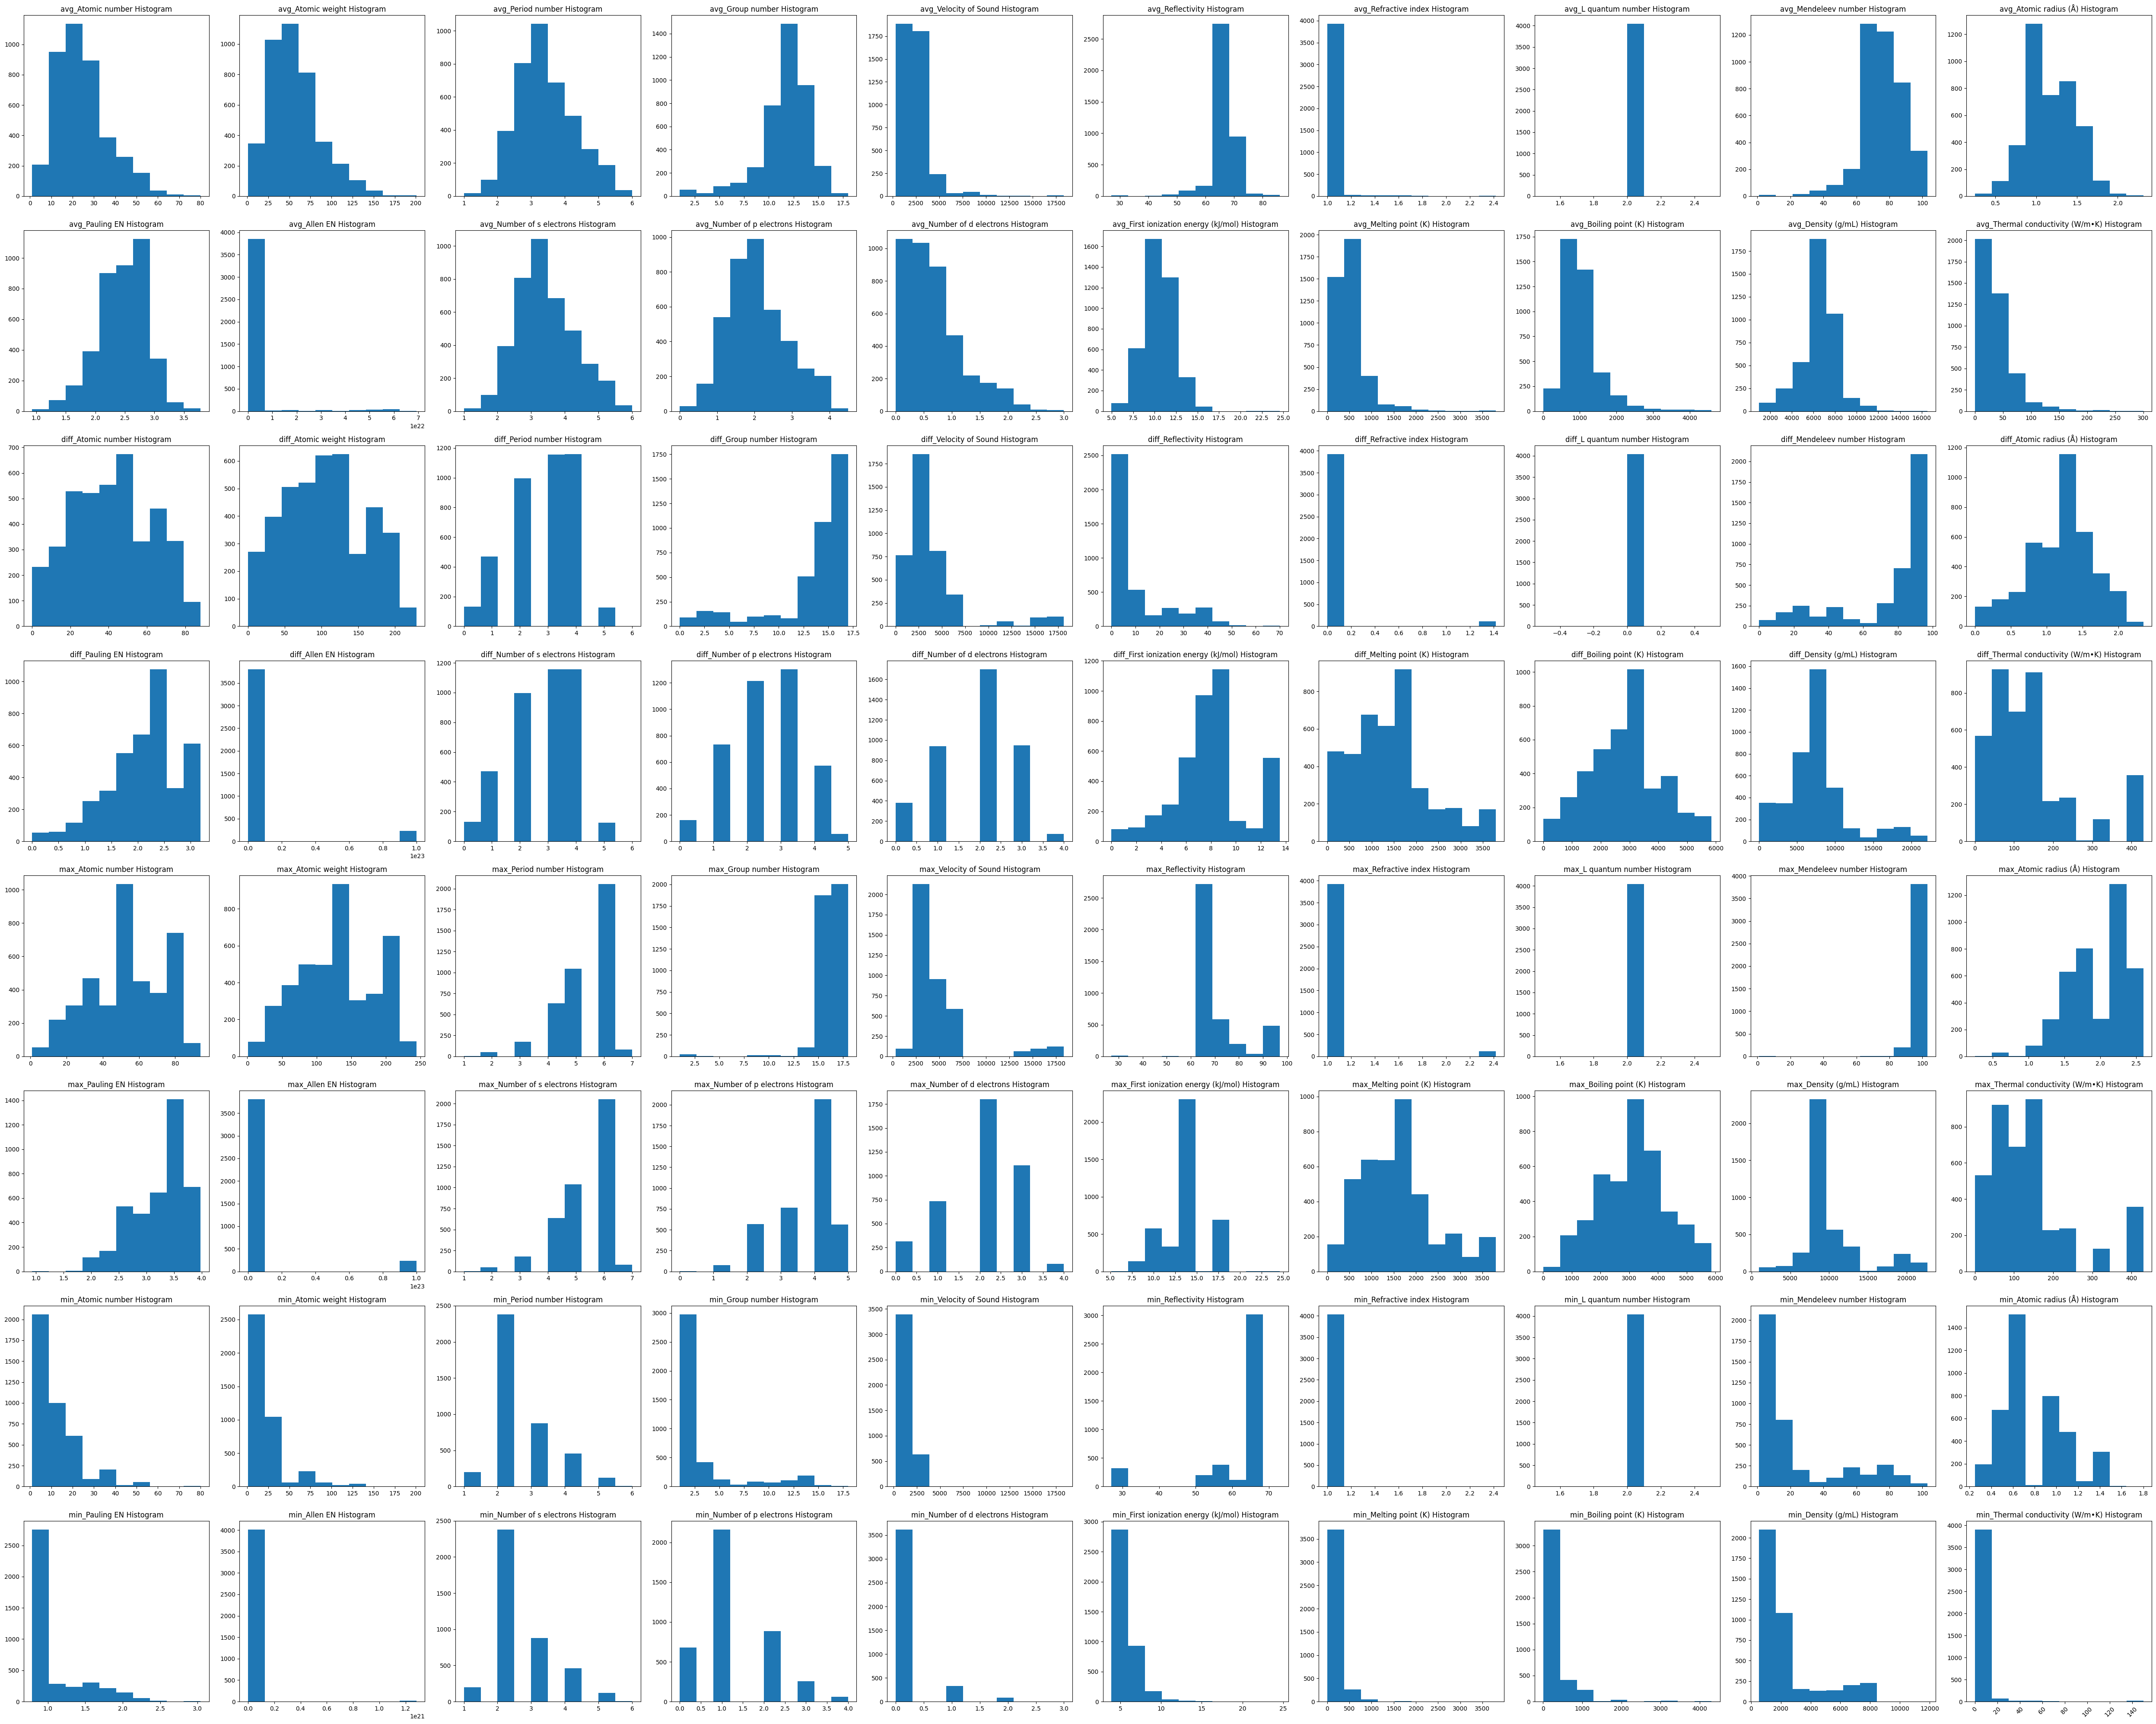

In [25]:
plot_variables(df=desc, vars_to_plot=cols, cts_vars=cols, num_cols=10, hist_num_bins=10)

### Preprocessing

In [26]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
    ])

preprocessor = ColumnTransformer(
    transformers=[('numeric', numeric_transformer, cols)],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
data = pipeline.fit_transform(desc)

In [27]:
dataframe = pd.DataFrame(data, columns=cols, index=df.index)

## ML Models Regression

### Setup

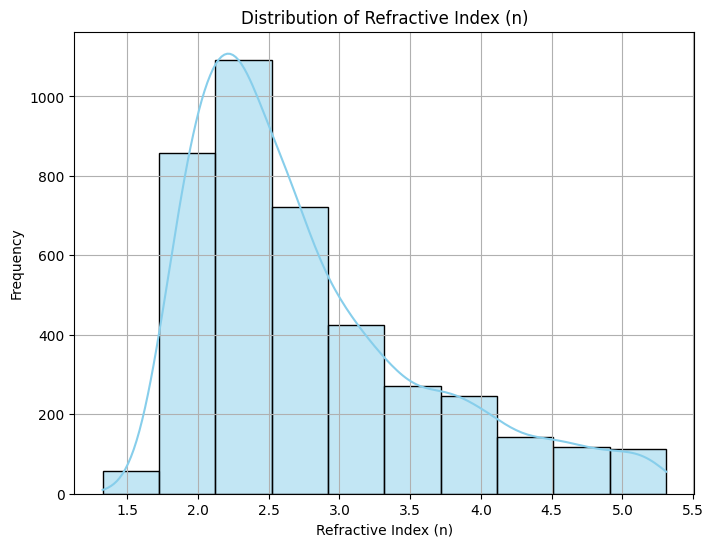

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(df['n'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Refractive Index (n)')
plt.xlabel('Refractive Index (n)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(dataframe, df["n"], test_size=0.3, random_state=42)

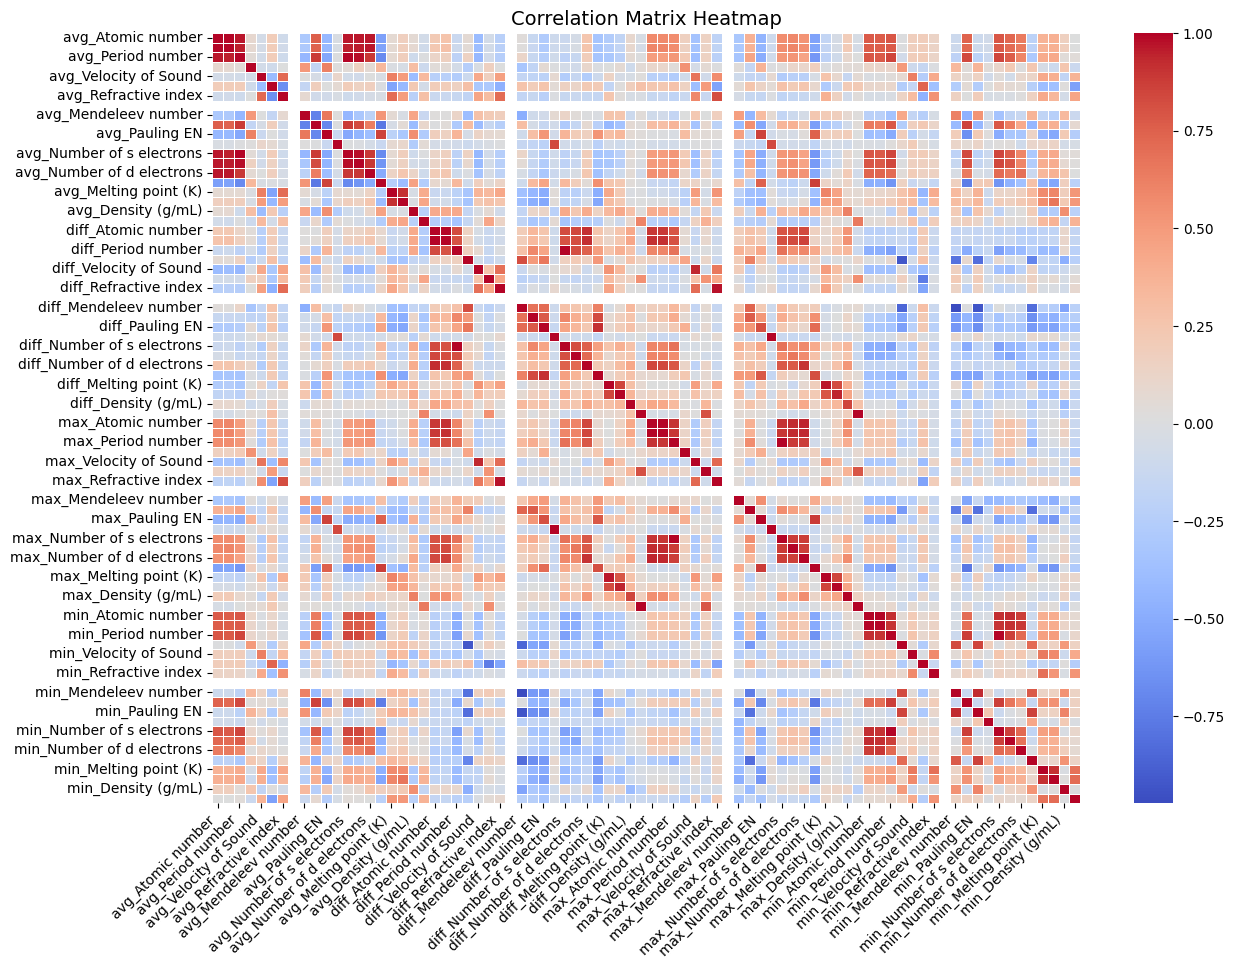

In [30]:
corr_matrix = X_train.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 8},
    )
plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

In [31]:
r_squared_threshold = 0.95
r_squared = corr_matrix ** 2
mask = np.triu(np.ones(r_squared.shape), k=1).astype(bool)
r_squared_triu = r_squared.where(mask)
drop_cols = [col for col in r_squared_triu.columns if any(r_squared_triu[col] > r_squared_threshold)]
X_train = X_train.drop(drop_cols, axis=1)
X_test = X_test.drop(drop_cols, axis=1)
print(f"Columns dropped due to high correlation: {drop_cols}")

Columns dropped due to high correlation: ['avg_Atomic weight', 'avg_Number of s electrons', 'avg_Number of p electrons', 'diff_Atomic weight', 'diff_Number of s electrons', 'max_Atomic weight', 'max_Allen EN', 'max_Number of s electrons', 'max_Thermal conductivity (W/m•K)', 'min_Atomic weight', 'min_Number of s electrons']


In [32]:
def eval_reg_model(X_data, X_test, y_data, y_test, model):
    model.fit(X_data, y_data)
    pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, pred, squared=False)
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    model_name = type(model).__name__
    print("model: {},  rmse = {:.2f}, mae = {:.2f}, r2 = {:.2f}".format(model_name, rmse, mae, r2))

### Linear, Decision Tree, Support Vector, and Random Forest

In [186]:
eval_reg_model(X_train, X_test, y_train, y_test, LinearRegression())
eval_reg_model(X_train, X_test, y_train, y_test, DecisionTreeRegressor())
eval_reg_model(X_train, X_test, y_train, y_test, SVR(kernel="rbf"))
eval_reg_model(X_train, X_test, y_train, y_test, RandomForestRegressor())

model: LinearRegression,  rmse = 0.65, mae = 0.48, r2 = 0.42
model: DecisionTreeRegressor,  rmse = 0.73, mae = 0.42, r2 = 0.28
model: SVR,  rmse = 0.59, mae = 0.38, r2 = 0.52
model: RandomForestRegressor,  rmse = 0.50, mae = 0.32, r2 = 0.66


### Random Forest with GridSearchCV

In [187]:
%%time
search_space = {
   "n_estimators": [100, 200, 300],
   "max_features": [80, 90, 100],
   "max_depth": [7, 10, 14]
    }
forest_reg = RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(estimator=forest_reg, param_grid=search_space,
                           cv=5, scoring="r2", return_train_score=True)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
eval_reg_model(X_train, X_test, y_train, y_test, grid_search.best_estimator_)

{'max_depth': 14, 'max_features': 100, 'n_estimators': 300}
0.6142534935067718
model: RandomForestRegressor,  rmse = 0.50, mae = 0.33, r2 = 0.65
CPU times: user 5min 13s, sys: 1.21 s, total: 5min 14s
Wall time: 5min 17s


Cross-validation Average R2: 0.5603151515940568


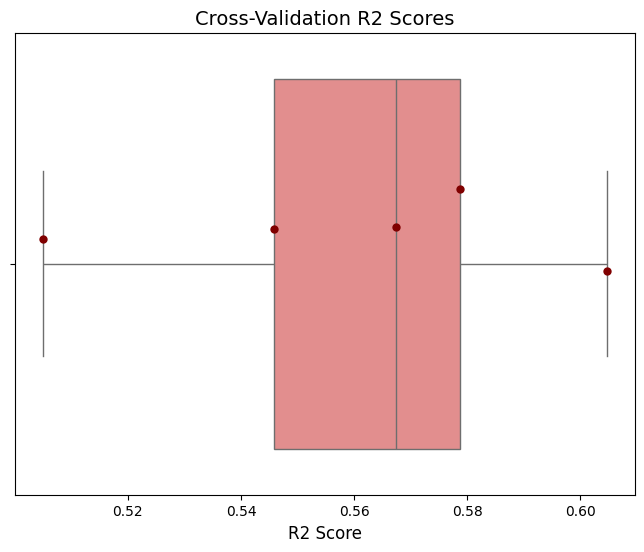

In [188]:
scores = cross_val_score(grid_search.best_estimator_, X_test, y_test, cv=5, scoring='r2')

print("Cross-validation Average R2:", scores.mean())

plt.figure(figsize=(8, 6))
sns.boxplot(x=scores, color='lightcoral')
sns.stripplot(x=scores, color='maroon', size=6, jitter=0.2)
plt.title('Cross-Validation R2 Scores', fontsize=14)
plt.xlabel('R2 Score', fontsize=12)
plt.show()

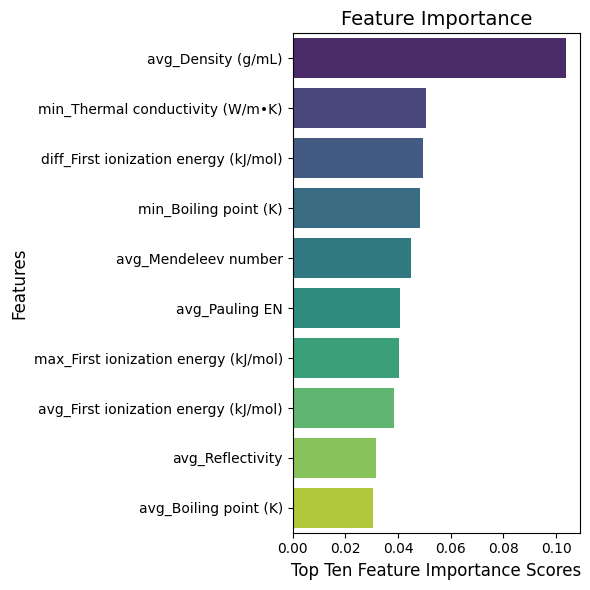

In [189]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_imp = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(6, 6))
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10], palette="viridis")
plt.xlabel("Top Ten Feature Importance Scores", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [190]:
explainer = shap.Explainer(grid_search.best_estimator_)
shap_values = explainer(X_test)

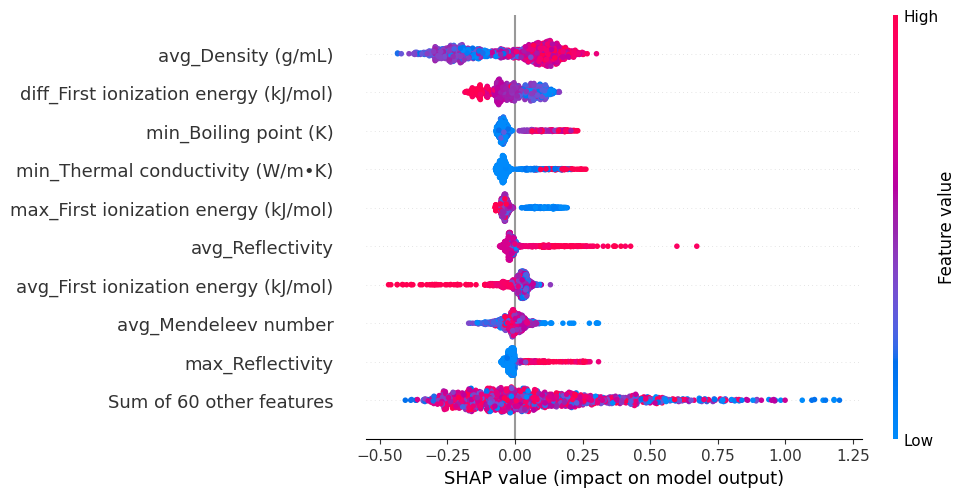

In [191]:
shap.plots.beeswarm(shap_values)

In [192]:
y_pred = grid_search.best_estimator_.predict(X_test)

metrics = {
    "MSE": mean_squared_error(y_test, y_pred),
    "RMSE": mean_squared_error(y_test, y_pred, squared=False),
    "MAE": mean_absolute_error(y_test, y_pred),
    "R²": r2_score(y_test, y_pred)
    }

for metric_name, metric_value in metrics.items():
    print(f"{metric_name}: {metric_value:.4f}")

MSE: 0.2547
RMSE: 0.5047
MAE: 0.3322
R²: 0.6527


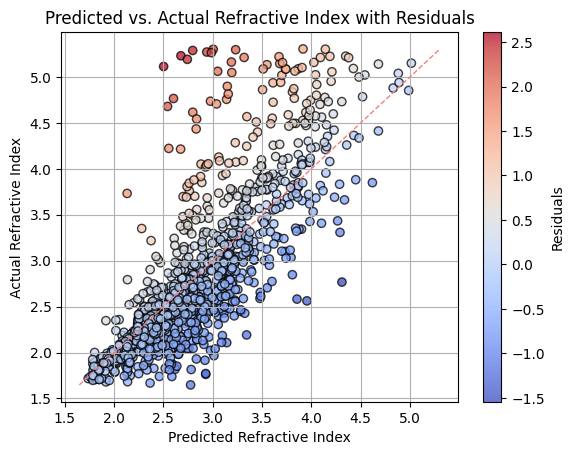

In [193]:
residuals = y_test.to_numpy().flatten() - y_pred
min_val = min(min(y_pred), min(y_test))
max_val = max(max(y_pred), max(y_test))

plt.scatter(y_pred, y_test, c=residuals, cmap='coolwarm', edgecolor='k', alpha=0.75)
plt.plot([min_val, max_val], [min_val, max_val], color='lightcoral', linestyle='--', linewidth=1)

plt.colorbar(label='Residuals')
plt.xlabel("Predicted Refractive Index")
plt.ylabel("Actual Refractive Index")
plt.title("Predicted vs. Actual Refractive Index with Residuals")
plt.grid(True)
plt.show()

### Bagging, Random Forest, Extra Trees, AdaBoost, Gradient Boosting, and Hist Gradient Boosting

In [33]:
model_list = [
    (BaggingRegressor(estimator= Ridge(), n_estimators=100, random_state=42), "BaggingRegressor"),
    (RandomForestRegressor(random_state=42), "RandomForestRegressor"),
    (ExtraTreesRegressor(random_state=42), "ExtraTreesRegressor"),
    (AdaBoostRegressor(random_state=42), "AdaBoostRegressor"),
    (GradientBoostingRegressor(random_state=42), "GradientBoostingRegressor"),
    (HistGradientBoostingRegressor(random_state=42), "HistGradientBoostingRegressor")
    ]

In [34]:
def fit_model(regressor):

    if hasattr(regressor, 'early_stopping_rounds'):
        regressor.fit(
            X_train, y_train,
            eval_set=[(X_test, y_test)],
            early_stopping_rounds=10,
            eval_metric='rmse',
            verbose=False
            )
    else:
        regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, mae, r2

results = []
for reg, name in model_list:
    mse, mae, r2 = fit_model(reg)
    results.append({
        "Model": name,
        "MSE": mse,
        "MAE": mae,
        "R²": r2
        })

pd.DataFrame(results)

,Model,MSE,MAE,R²
0,BaggingRegressor,0.451733,0.500589,0.384046
1,RandomForestRegressor,0.242468,0.319254,0.669387
2,ExtraTreesRegressor,0.238302,0.297600,0.675067
3,AdaBoostRegressor,0.561576,0.657242,0.234272
4,GradientBoostingRegressor,0.296589,0.382449,0.595591
5,HistGradientBoostingRegressor,0.233229,0.313070,0.681984


Stacking Regressor

In [35]:
%%time
estimators = [
    ('ridge', Ridge()),
    ('linear', LinearRegression()),
    ('knr', KNeighborsRegressor())
    ]

final_estimator = HistGradientBoostingRegressor()
stacking_reg = StackingRegressor(estimators=estimators, final_estimator=final_estimator)

param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0],
    'knr__n_neighbors': [3, 5, 7],
    'final_estimator__max_bins': [40, 50, 60],
    'final_estimator__learning_rate': [0.01, 0.1, 0.2]
    }


grid_search = GridSearchCV(estimator=stacking_reg, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R²:", r2)
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
MSE: 0.3521596938613171
R²: 0.5198182778119373
Best Parameters: {'final_estimator__learning_rate': 0.1, 'final_estimator__max_bins': 40, 'knr__n_neighbors': 5, 'ridge__alpha': 10.0}
CPU times: user 5min 45s, sys: 5.48 s, total: 5min 50s
Wall time: 4min 23s


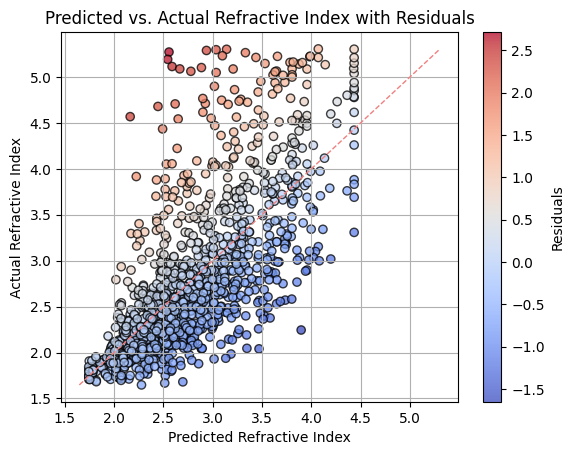

In [36]:
residuals = y_test.to_numpy().flatten() - y_pred
min_val = min(min(y_pred), min(y_test))
max_val = max(max(y_pred), max(y_test))

plt.scatter(y_pred, y_test, c=residuals, cmap='coolwarm', edgecolor='k', alpha=0.75)
plt.plot([min_val, max_val], [min_val, max_val], color='lightcoral', linestyle='--', linewidth=1)

plt.colorbar(label='Residuals')
plt.xlabel("Predicted Refractive Index")
plt.ylabel("Actual Refractive Index")
plt.title("Predicted vs. Actual Refractive Index with Residuals")
plt.grid(True)
plt.show()

### XGBoost

In [37]:
%%time
param_grid = {
              "max_depth": [8, 10],
              "reg_lambda": [5.0, 7.0],
              "colsample_bytree": [0.6, 0.7],
              "colsample_bylevel": [0.6, 0.7],
              "colsample_bynode": [0.75, 0.8, 0.85],
              }



grid_search = GridSearchCV(estimator = xgb.XGBRegressor(objective="reg:squarederror",
                                                        seed=42,
                                                        subsample=0.7,
                                                        early_stopping_rounds=20,
                                                        ),
                           param_grid=param_grid,
                           scoring="neg_root_mean_squared_error",
                           verbose=0,
                           n_jobs=4,
                           cv=2)

grid_search.fit(X_train,
                y_train,
                verbose=False,
                eval_set=[(X_test, y_test)]
                )

CPU times: user 3.56 s, sys: 465 ms, total: 4.02 s
Wall time: 1min 53s


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=20,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=4,
             param_grid={'colsample_bylevel': [0.6, 0.7],
                         'colsample_bynode': [0.75, 0.8, 0.85],
                         'colsample_bytree': [0.6, 0.7], 'max_depth': [8, 10],
                         'reg_lambda': [5.0, 7.0]},
             scoring='neg_root_mean_squared_error')

In [38]:
print(grid_search.best_params_)

{'colsample_bylevel': 0.7, 'colsample_bynode': 0.85, 'colsample_bytree': 0.6, 'max_depth': 8, 'reg_lambda': 7.0}


In [39]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [40]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")

Mean Squared Error (MSE): 0.2463
R-squared (R2 Score): 0.6641


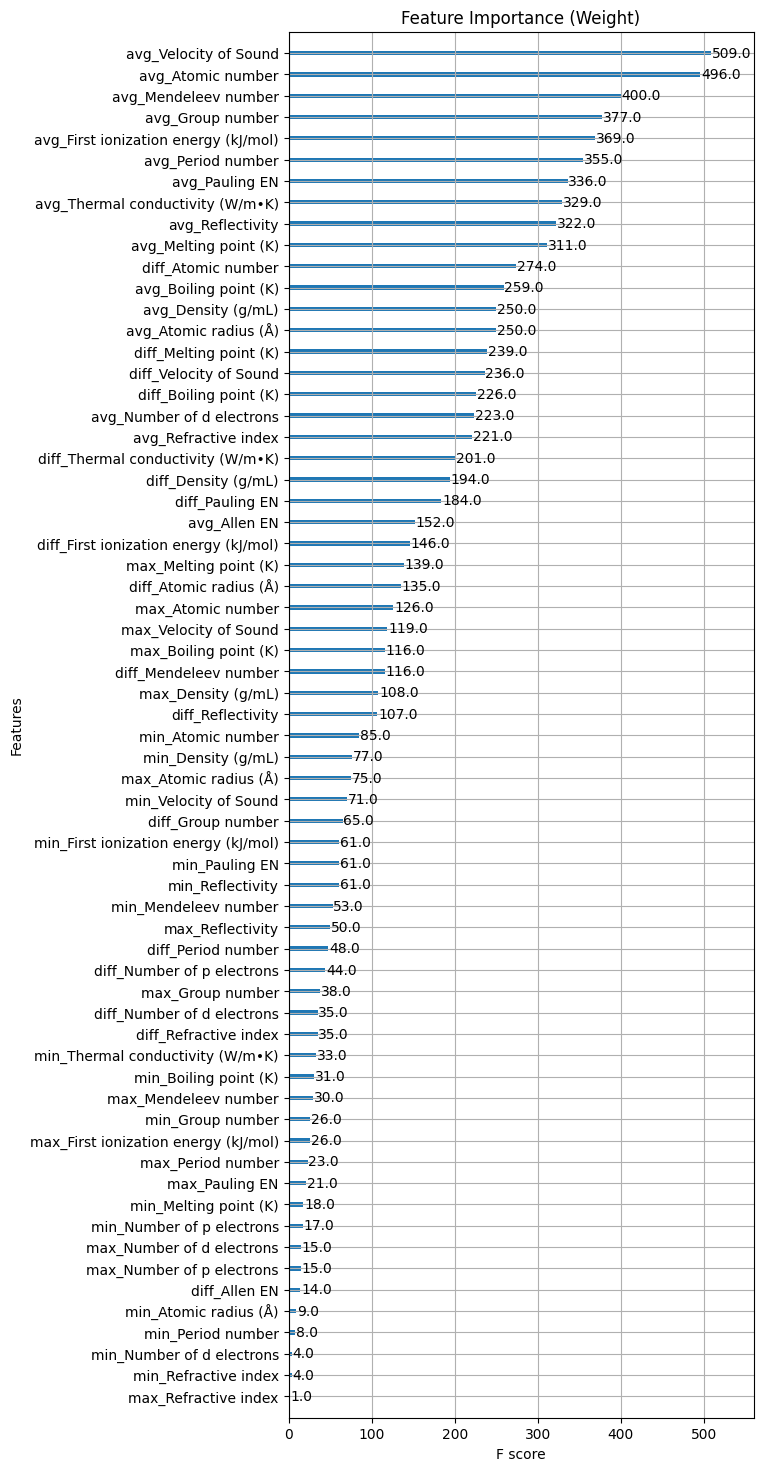

In [41]:
fig, ax = plt.subplots(figsize=(6, 18))
xgb.plot_importance(grid_search.best_estimator_, importance_type='weight', height=0.2, ax=ax)
plt.ylabel('Features')
plt.title('Feature Importance (Weight)')
plt.show()

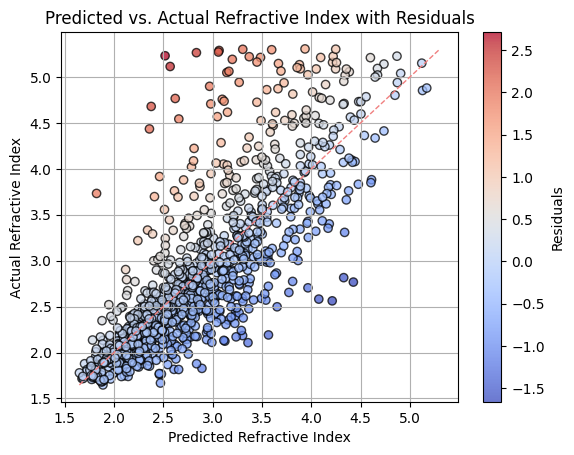

In [42]:
residuals = y_test.to_numpy().flatten() - y_pred
min_val = min(min(y_pred), min(y_test))
max_val = max(max(y_pred), max(y_test))

plt.scatter(y_pred, y_test, c=residuals, cmap='coolwarm', edgecolor='k', alpha=0.75)
plt.plot([min_val, max_val], [min_val, max_val], color='lightcoral', linestyle='--', linewidth=1)

plt.colorbar(label='Residuals')
plt.xlabel("Predicted Refractive Index")
plt.ylabel("Actual Refractive Index")
plt.title("Predicted vs. Actual Refractive Index with Residuals")
plt.grid(True)
plt.show()

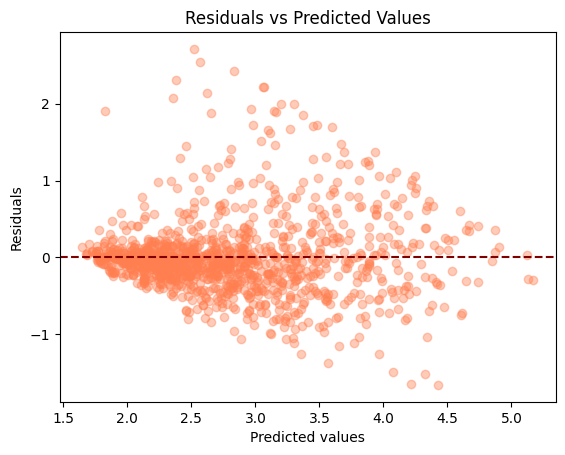

In [43]:
plt.figure()
plt.scatter(y_pred, residuals, color="coral", alpha=0.4)
plt.axhline(y=0, color='maroon', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

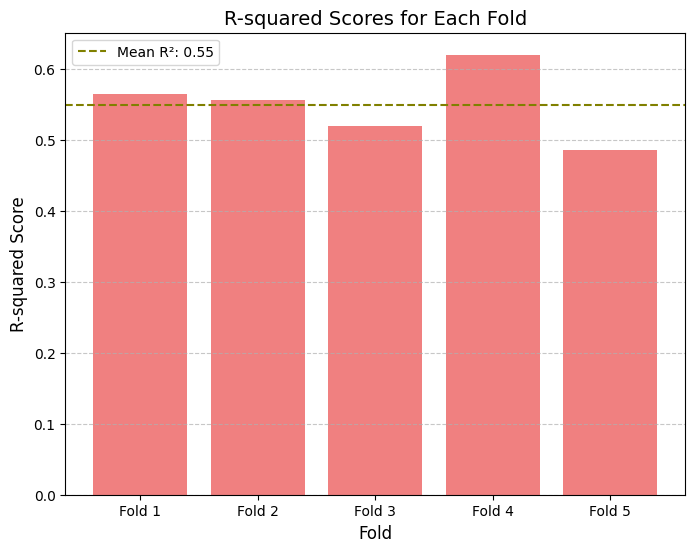

Mean R2 score: 0.5493794898025577


In [44]:
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []

for xt_index, xv_index in kfolds.split(X_test):
    Xt_fold, Xv_fold = X_test.iloc[xt_index], X_test.iloc[xv_index]
    yt_fold, yv_fold = y_test.iloc[xt_index], y_test.iloc[xv_index]

    best_estimator = grid_search.best_estimator_
    best_estimator.fit(Xt_fold, yt_fold,
                       eval_set=[(Xv_fold, yv_fold)],
                       verbose=False)

    pred = best_estimator.predict(Xv_fold)
    r2 = r2_score(yv_fold, pred)
    r2_scores.append(r2)

plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(r2_scores)), r2_scores, color='lightcoral')
plt.axhline(y=np.mean(r2_scores), color='olive', linestyle='--', label=f'Mean R²: {np.mean(r2_scores):.2f}')
plt.xlabel('Fold', fontsize=12)
plt.ylabel('R-squared Score', fontsize=12)
plt.title('R-squared Scores for Each Fold', fontsize=14)
plt.xticks(np.arange(len(r2_scores)), [f'Fold {i+1}' for i in range(len(r2_scores))])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()
print(f"Mean R2 score: {np.mean(r2_scores)}")

### LightGBM

In [45]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [46]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l2',
    'max_depth': -1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
    }

param_dist = {
    'num_leaves': [7, 13, 17, 20],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [200, 500, 700]
    }

In [47]:
%%time
lgb_estimator = lgb.LGBMRegressor(**params)

random_search = RandomizedSearchCV(estimator=lgb_estimator,
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   cv=5,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
CPU times: user 4.26 s, sys: 480 ms, total: 4.74 s
Wall time: 2min 56s


RandomizedSearchCV(cv=5,
                   estimator=LGBMRegressor(bagging_fraction=0.8, bagging_freq=5,
                                           feature_fraction=0.9, metric='l2',
                                           objective='regression', verbose=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                        'n_estimators': [200, 500, 700],
                                        'num_leaves': [7, 13, 17, 20]})

In [48]:
print("Best hyperparameters: ", random_search.best_params_)

Best hyperparameters:  {'num_leaves': 20, 'n_estimators': 700, 'learning_rate': 0.05}


In [49]:
y_pred = random_search.best_estimator_.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [50]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")

Mean Squared Error (MSE): 0.2283
R-squared (R2 Score): 0.6887


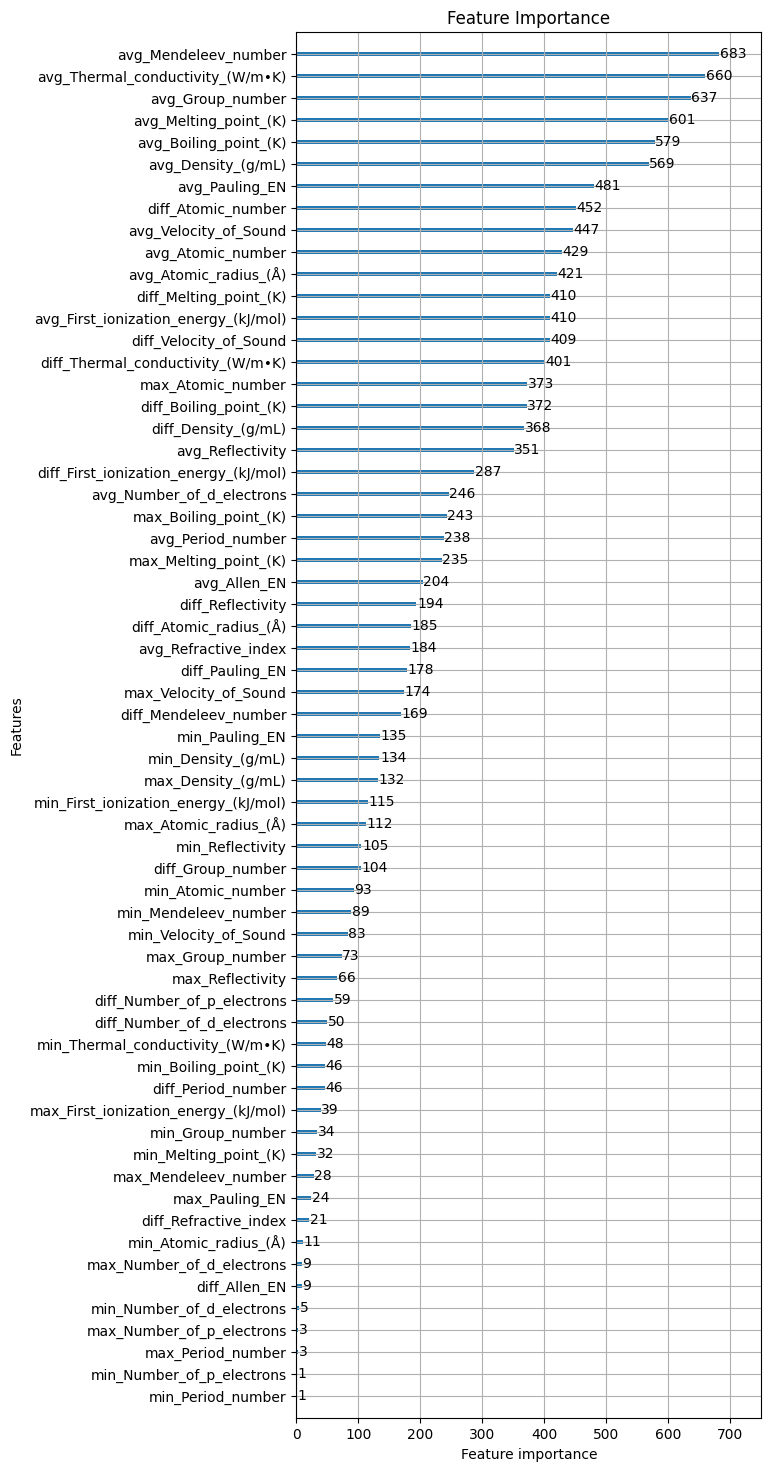

In [51]:
fig, ax = plt.subplots(figsize=(6, 18))
lgb.plot_importance(random_search.best_estimator_, height=0.2, ax=ax)
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

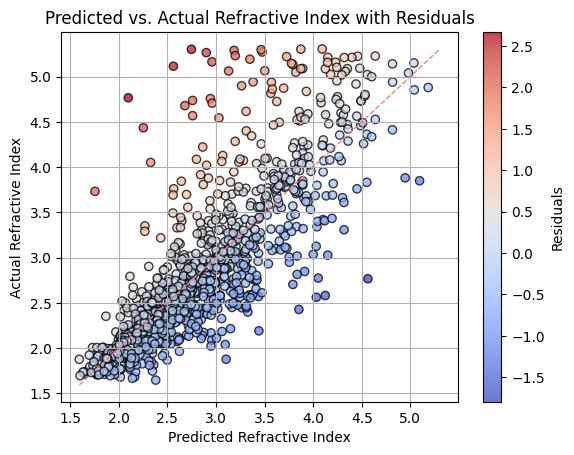

In [52]:
residuals = y_test.to_numpy().flatten() - y_pred
min_val = min(min(y_pred), min(y_test))
max_val = max(max(y_pred), max(y_test))

plt.scatter(y_pred, y_test, c=residuals, cmap='coolwarm', edgecolor='k', alpha=0.75)
plt.plot([min_val, max_val], [min_val, max_val], color='lightcoral', linestyle='--', linewidth=1)

plt.colorbar(label='Residuals')
plt.xlabel("Predicted Refractive Index")
plt.ylabel("Actual Refractive Index")
plt.title("Predicted vs. Actual Refractive Index with Residuals")
plt.grid(True)
plt.show()

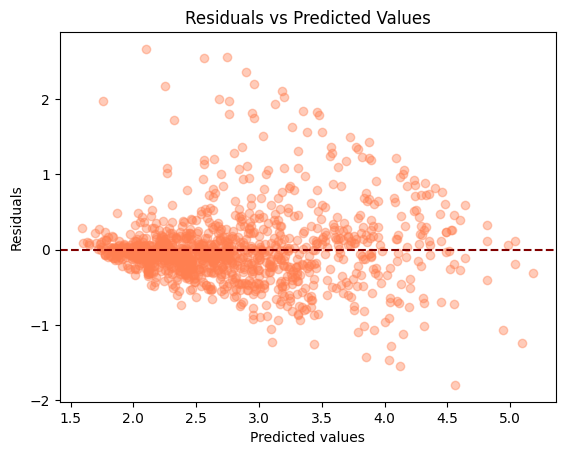

In [53]:
plt.figure()
plt.scatter(y_pred, residuals, color="coral", alpha=0.4)
plt.axhline(y=0, color='maroon', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: ba

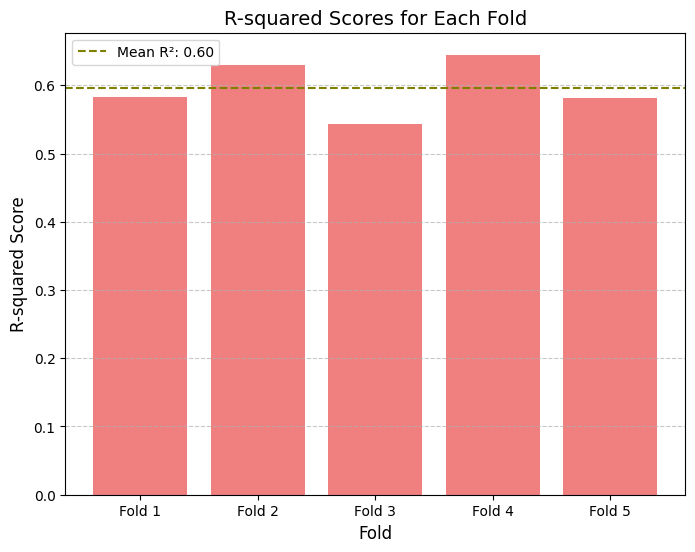

Mean R2 score: 0.5963712199102618


In [54]:
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []

for xt_index, xv_index in kfolds.split(X_test):
    Xt_fold, Xv_fold = X_test.iloc[xt_index], X_test.iloc[xv_index]
    yt_fold, yv_fold = y_test.iloc[xt_index], y_test.iloc[xv_index]

    best_estimator = random_search.best_estimator_
    best_estimator.fit(Xt_fold, yt_fold,
                       eval_set=[(Xv_fold, yv_fold)])

    pred = best_estimator.predict(Xv_fold)
    r2 = r2_score(yv_fold, pred)
    r2_scores.append(r2)

plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(r2_scores)), r2_scores, color='lightcoral')
plt.axhline(y=np.mean(r2_scores), color='olive', linestyle='--', label=f'Mean R²: {np.mean(r2_scores):.2f}')
plt.xlabel('Fold', fontsize=12)
plt.ylabel('R-squared Score', fontsize=12)
plt.title('R-squared Scores for Each Fold', fontsize=14)
plt.xticks(np.arange(len(r2_scores)), [f'Fold {i+1}' for i in range(len(r2_scores))])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()
print(f"Mean R2 score: {np.mean(r2_scores)}")